## Project Name : Melanoma Detection Assignment
## Contributors : Vidhi Surana Datar (DS C48), Yudishthir & Namrata
## Date : 11-07-2013

#************************************************************************
#### NOTE : Please change the dataset link to point to your drive folder before running this code
#*************************************************************************

##Problem statement:
To build a CNN based model which can accurately detect
melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## What's in the notebook:
In this notebook, we will build a simple CNN-based architecture to classify the iamges to accurately detect melanoma.

We will go through the following steps:

1. Importing libraries and the dataset
2. Data preparation: Train-test split, specifying the shape of the input data etc.
3. Building and understanding the CNN architecture
4. Fitting and evaluating the model

NOTE: Sequential from keras.models: Sequential is the keras abstraction for creating models with a stack of layers (MLP has multiple hidden layers, CNNs have convolutional layers, etc.).
Various types of layers from keras.layers: These layers are added (one after the other) to the Sequential model

#### Steps in creating CNN Model
1. Data Reading/Data Understanding → Defining the path for train and test images
2. Dataset Creation→ Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.
3. Dataset visualisation → Create a code to visualize one instance of all the nine classes present in the dataset
4. Model Building & training :
        -   Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to  normalize pixel values between (0,1).
        -   Choose an appropriate optimiser and loss function for model training
        -   Train the model for ~20 epochs
        -   Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.
5.  Chose an appropriate data augmentation strategy to resolve underfitting/overfitting
6.  Model Building & training on the augmented data :
    -   Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).
        -   Choose an appropriate optimiser and loss function for model training
        -   Train the model for ~20 epochs
        -   Write your findings after the model fit, see if the earlier issue is resolved or not?
7. Class distribution: Examine the current class distribution in the training dataset
        -  Which class has the least number of samples?
        -  Which classes dominate the data in terms of the proportionate number of samples?
8. Handling class imbalances: Rectify class imbalances present in the training dataset with Augmentor library.
9. Model Building & training on the rectified class imbalance data :
        -   Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
        -   Choose an appropriate optimiser and loss function for model training
        -   Train the model for ~30 epochs
        -   Write your findings after the model fit, see if the issues are resolved or not?


### Importing all the important libraries

In [1]:
import pathlib #With pathlib , you can represent file paths with dedicated Path objects instead of plain strings.
import tensorflow as tf #Tensorflow bundles together Machine Learning and Deep Learning models and algorithms
import matplotlib.pyplot as plt #collection of command style functions that make matplotlib work like MATLAB.plotting graphs is easy
import numpy as np # NumPy is mostly used for working with Numerical values as it makes it easy to apply mathematical functions.
import pandas as pd #Pandas is mostly used for data analysis tasks in Python.
import os #it lets the user interact with the native OS Python is currently running on.
import PIL #to make it backward compatible with an older module called Python Imaging Library (PIL).

In [2]:
from tensorflow import keras #Keras is the high-level API of the TensorFlow platform: an approachable, highly-productive interface for solving machine learning problems
from tensorflow.keras import layers #A layer is a callable object that takes as input one or more tensors and that outputs one or more tensors.
from tensorflow.keras.models import Sequential #The core idea of Sequential API is simply arranging the Keras layers in a sequential order and so, it is called Sequential API.
#Keras Dense layer is the layer that contains all the neurons that are deeply connected within themselves
#Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
#Keras MaxPool2D downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size ) for each channel of the inpu
#Keras Dropout - Input data may have some of the unwanted data, usually called as Noise. Dropout will try to remove the noise data and thus prevent the model from over-fitting.
#Keras Flatten -  Flatten layer flattens each batch in the inputs to 1-dimension.
#Keras BatchNormalisation -  Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
#Keras Activiation - Applies an activation function to an output
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Dropout,  Flatten, BatchNormalization, Activation
from tensorflow.keras.layers.experimental.preprocessing import Rescaling #A preprocessing layer which rescales input values to a new range.
#Keras ImageDataGenerator is used for getting the input of the original data and further, it makes the transformation of this data on a random basis and
#gives the output resultant containing only the data that is newly transformed. It does not add the data.
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam #Adaptive moment estimation is an optimization algorithm is a further extension of stochastic gradient
#descent to update network weights during training.07-Oct-2021
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

## Section 1:Data Reading/Data Understanding

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [4]:
!unzip '/content/gdrive/My Drive/CNN_assignment.zip' -d '/content/gdrive/My Drive/CNN_Assignment'

Archive:  /content/gdrive/My Drive/CNN_assignment.zip
  inflating: /content/gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  in

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
#Counting the number of images in both the directories
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [7]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

## Section 2:Dataset Creation - Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#Calling image_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches of images
#from the subdirectories class_a and class_b etc., together with labels 0 and 1 (0 corresponding to class_a and 1 corresponding to class_b).
#img_size below is the Size to resize images to after they are read from disk, specified as (height, width)
#batch_size is the size of the batches of data
#validation_split is Optional float between 0 and 1, fraction of data to reserve for validation.
#Seed is Optional random seed for shuffling and transformations.
#subset is Subset of the data to return. One of "training", "validation" or "both".
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height,img_width),
    seed=123,
    validation_split=0.2,
    subset="training",
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height,img_width),
    seed=123,
    validation_split=0.2,
    subset="validation",
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Section 3: Dataset visualisation - **Visualize** the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

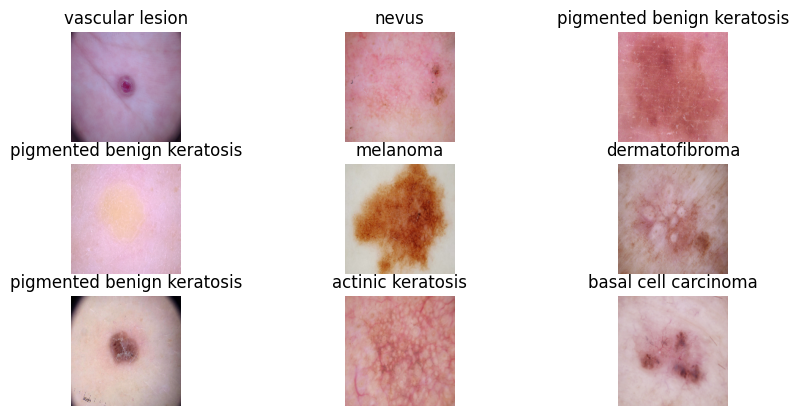

In [12]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
#the train_ds dataset yields a tuple (images, labels)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(6, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

##  Section 4: Model Building & training
#### *Create* the model
*Create* a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

## Base Model 1:

 - Rescaling Layer
 - 2D Convolution Layer
 - Max Pooling Layer
 - 2D Convolution Layer
 - Max Pooling Layer
 - 2D Convolution Layer
 - Max Pooling Layer
 - Flattening layer
 - Dense Layer
 - Dense Layer


In [14]:
### Your code goes here
input_shape = (180,180,3)
activ = 'relu'
num_classes=9
 # Rescaling - A preprocessing layer which rescales input values to a new range. (Here its diving by 1/255)
#preprocessing_layers = [
 #   tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3))
#]
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))

#2D convolution layer
model.add(Conv2D(16, kernel_size=(3, 3), padding='same',activation='relu', input_shape=input_shape))
#Maxpooling Layer
#Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

#Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
##Flattens the input. Does not affect the batch size.
model.add(Flatten())

#fully connected layer
#A hidden layer in which each node is connected to every node in the subsequent hidden layer.
#A fully connected layer is also known as a dense layer.
model.add(Dense(128, activation='relu'))

#Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
#It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
#Dense implements the operation: output = activation(dot(input, kernel)
#Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
model.add(Dense(num_classes))
## Number of classes is 9
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Compile the model
Choose an appropirate optimiser and loss function for model training


In [15]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [17]:
epochs = 20
batch_size = 32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 30s 67ms/step - loss: 1.8818 - accuracy: 0.3092 - val_loss: 1.7241 - val_accuracy: 0.4004
Epoch 2/20
56/56 [==============================] - 1s 21ms/step - loss: 1.6078 - accuracy: 0.4219 - val_loss: 1.5446 - val_accuracy: 0.4720
Epoch 3/20
56/56 [==============================] - 1s 20ms/step - loss: 1.4685 - accuracy: 0.4771 - val_loss: 1.4385 - val_accuracy: 0.5190
Epoch 4/20
56/56 [==============================] - 1s 20ms/step - loss: 1.3307 - accuracy: 0.5379 - val_loss: 1.3373 - val_accuracy: 0.5302
Epoch 5/20
56/56 [==============================] - 1s 20ms/step - loss: 1.1968 - accuracy: 0.5804 - val_loss: 1.3026 - val_accuracy: 0.5503
Epoch 6/20
56/56 [==============================] - 1s 21ms/step - loss: 1.0899 - accuracy: 0.6194 - val_loss: 1.3019 - val_accuracy: 0.5302
Epoch 7/20
56/56 [==============================] - 1s 21ms/step - loss: 1.0112 - accuracy: 0.6406 - val_loss: 1.3204 - val_accuracy: 0.5459
Epoch 8/20
5

### Visualizing training results

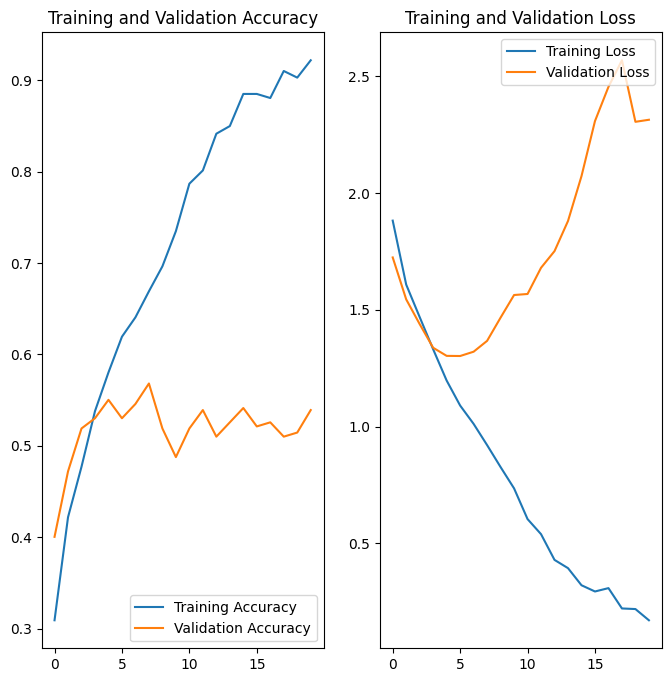

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

The model seems to overfits hence we can try implementing Regularisation.

Neural networks that are usually large, complex models with tens of thousands of parameters have a tendency to overfit the training data. As with many other ML models, regularisation is a common technique used in neural networks to address this problem. Let's now take a look at a popular regularisation technique used for neural networks called dropouts.

The main purpose of using dropouts is to reduce overfitting. Sometimes, a model trains on the training data set and its weights and biases converge to very specific values, values that are ideal for only the training data set. Adding a dropout layer to the neural network helps to break that specific combination of weights and biases.



#### Model 2 : Base Model + Dropout Layer
    We changed the above model to include a Dropput layer before every Convolution Layer with Dropout ratio .2
    The final activation function was changed to softmax.
    The new model consisted of:
    - Rescaling Layer
    - 2D Convolution Layer
    - Max Pooling Layer
    - Drop Out Layer
    - 2D Convolution Layer
    - Max Pooling Layer
    - Drop Out Layer
    - 2D Convolution Layer
    - Max Pooling Layer
    - Drop Out Layer
    - Flattening layer
    - Dense Layer
    - Dense Layer

In [19]:
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size.
  layers.MaxPooling2D(),

  layers.Dropout(0.2), #Since the model is overfitting lets see how it performs by adding a dropout layer

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size.
  layers.MaxPooling2D(),
  layers.Dropout(0.2), #Since the model is overfitting lets see how it performs by adding a dropout layer

  layers.Conv2D(256, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size.
  layers.MaxPooling2D(),
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting

  layers.Dropout(0.2), #Since the model is overfitting lets see how it performs by adding a dropout layer

  layers.Flatten(),
  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  layers.Dense(128, activation='relu'),
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes,activation='softmax')
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])


In [20]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 90, 90, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                  

In [22]:
epochs = 20
batch_size = 32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 11s 129ms/step - loss: 2.3641 - accuracy: 0.2098 - val_loss: 2.0648 - val_accuracy: 0.3400
Epoch 2/20
56/56 [==============================] - 6s 114ms/step - loss: 1.9509 - accuracy: 0.2539 - val_loss: 1.8685 - val_accuracy: 0.3199
Epoch 3/20
56/56 [==============================] - 6s 114ms/step - loss: 1.7311 - accuracy: 0.3862 - val_loss: 1.6412 - val_accuracy: 0.3893
Epoch 4/20
56/56 [==============================] - 6s 113ms/step - loss: 1.6012 - accuracy: 0.4169 - val_loss: 1.5496 - val_accuracy: 0.4206
Epoch 5/20
56/56 [==============================] - 6s 113ms/step - loss: 1.5435 - accuracy: 0.4565 - val_loss: 1.5311 - val_accuracy: 0.4787
Epoch 6/20
56/56 [==============================] - 6s 112ms/step - loss: 1.4421 - accuracy: 0.4877 - val_loss: 1.4342 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 6s 112ms/step - loss: 1.3074 - accuracy: 0.5385 - val_loss: 1.4019 - val_accuracy: 0.5123
Epoch 8/20
56/56

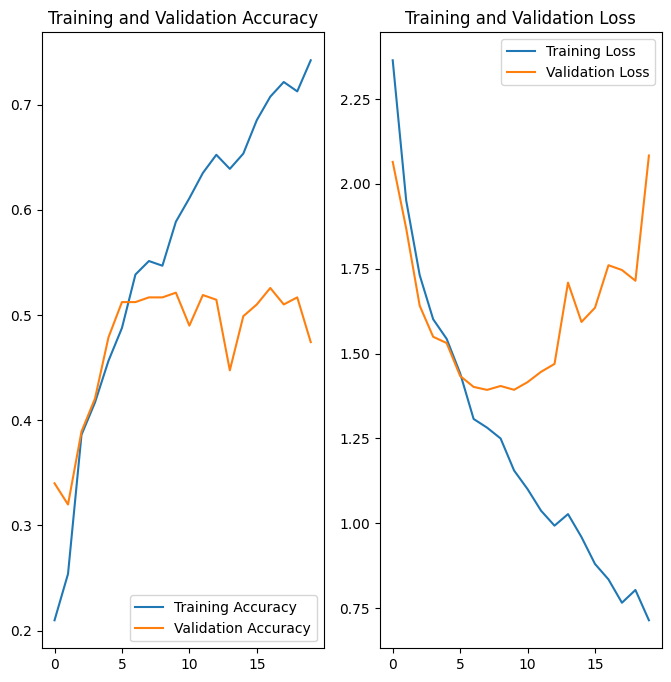

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Write your findings here

We see that it reduced the gap between training and validation accuracy but the validation accuracy is still low, let's check now if augmentation helps.

## Section 4: Choose an Augmentation Strategy

In [24]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# data augmentation: a technique to increase the diversity of your training set by applying random (but realistic) transformations,
# such as image rotation etc. We will be using Keras preprocessing layers to do this such as tf.keras.layers.RandomFlip and tf.keras.layers.RandomRotation.
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    layers.experimental.preprocessing.RandomCrop(img_height,img_width),
  ]
)

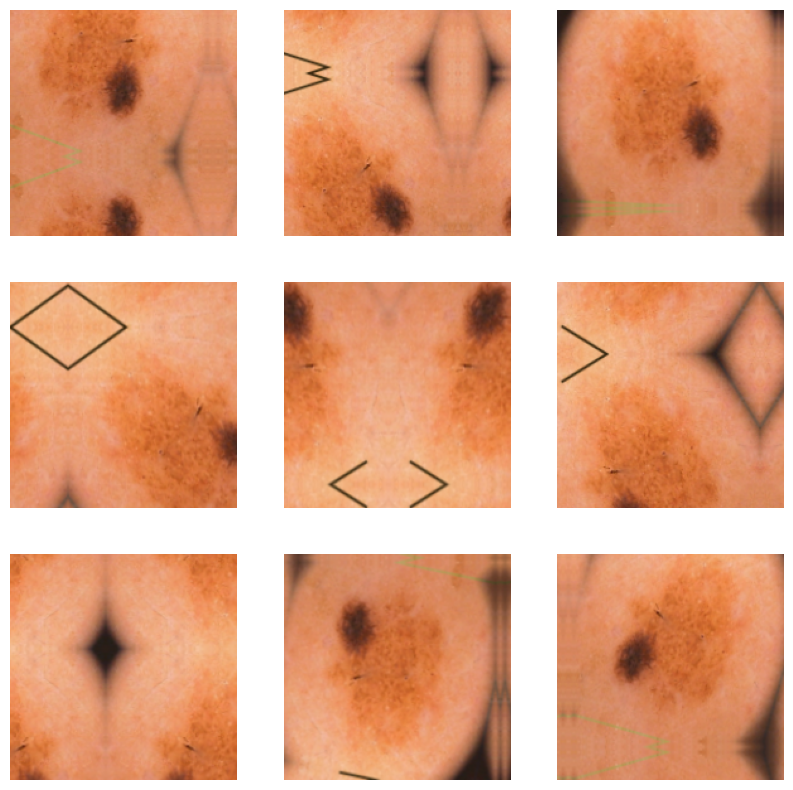

In [25]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Section 5:  Model Building & training on the augmented data

### Todo:
### Create the model, compile and train the model

#### Model 3 : Model 2 + Image augmentation Real Time

In [26]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])



### Compiling the model

In [27]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [28]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 10s 126ms/step - loss: 2.4300 - accuracy: 0.1948 - val_loss: 2.0451 - val_accuracy: 0.2125
Epoch 2/20
56/56 [==============================] - 7s 119ms/step - loss: 1.8826 - accuracy: 0.2935 - val_loss: 1.7402 - val_accuracy: 0.3333
Epoch 3/20
56/56 [==============================] - 7s 118ms/step - loss: 1.7453 - accuracy: 0.3488 - val_loss: 1.8228 - val_accuracy: 0.3333
Epoch 4/20
56/56 [==============================] - 7s 118ms/step - loss: 1.6955 - accuracy: 0.3633 - val_loss: 1.6418 - val_accuracy: 0.4116
Epoch 5/20
56/56 [==============================] - 7s 117ms/step - loss: 1.6616 - accuracy: 0.3610 - val_loss: 1.5904 - val_accuracy: 0.4139
Epoch 6/20
56/56 [==============================] - 7s 117ms/step - loss: 1.6567 - accuracy: 0.3610 - val_loss: 1.6203 - val_accuracy: 0.3960
Epoch 7/20
56/56 [==============================] - 6s 116ms/step - loss: 1.6398 - accuracy: 0.3789 - val_loss: 1.6746 - val_accuracy: 0.3848
Epoch

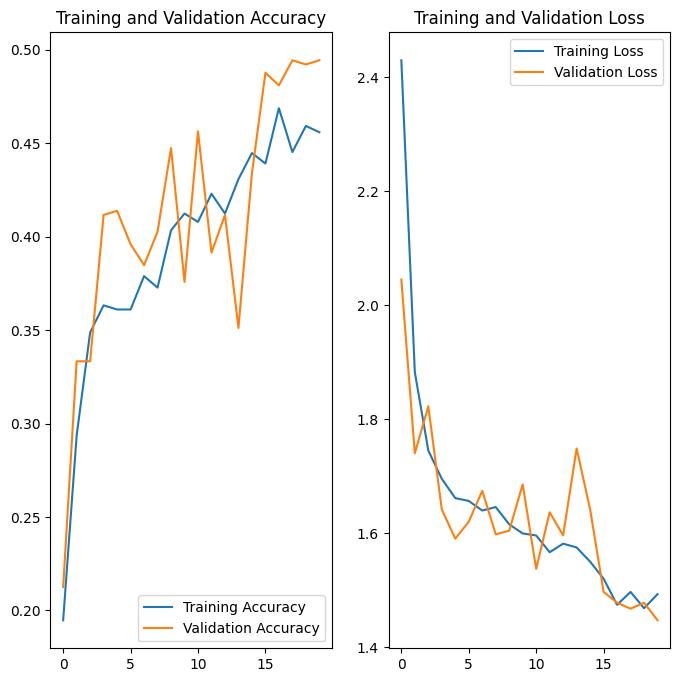

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

That made huge difference, the model does not overfit anymore but the training accuracy is gone very low meaning it needs more data to train.

In [30]:
# For convenience, let us set up the path for the training and validation sets
train_dir = os.path.join('/content/gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
val_dir = os.path.join('/content/gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

Image augmentation is a technique of preprocessing image data. It involves
applying transformations (rotation, cropping, shearing, zooming etc.) on our existing images and adding these images to our database.

These transformed images are completely new to our model and help us in 2 two ways:

Increases the size of our dataset
Makes our model more robust and capable of handling ‘true-to-life’ images, which are not ‘perfect’

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Setting batch size and image size
batch_size = 100
IMG_SHAPE = 180

# Create training images generator
#Generate batches of tensor image data with real-time data augmentation.
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
#This line of code is used to define the transformations that the training DataGenerator will
#apply on all the images to augment the size of the dataset.
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
#https://keras.io/api/preprocessing/image/
#Then calling image_dataset_from_directory(main_directory, labels='inferred') will
#return a tf.data.Dataset that yields batches of images from the subdirectories
train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

# Create validation images generator
#For the validation DataGenerator, we only
#specify the scaling factor. The other transformations are not required because we are not training the model on this data.
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


#### Model 4: Model 3 + Augmentation using Image Data Generator (Creating different transformed dataset images)

In [32]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])



In [33]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
## Your code goes here, note: train your model for 20 epochs
epochs = 10
history = model.fit(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=epochs
)

Epoch 1/10
23/23 [==============================] - 71s 3s/step - loss: 2.0645 - accuracy: 0.1974 - val_loss: 2.3008 - val_accuracy: 0.1356
Epoch 2/10
23/23 [==============================] - 61s 3s/step - loss: 2.0294 - accuracy: 0.2050 - val_loss: 2.2111 - val_accuracy: 0.1356
Epoch 3/10
23/23 [==============================] - 60s 3s/step - loss: 2.0245 - accuracy: 0.1925 - val_loss: 2.2109 - val_accuracy: 0.1356
Epoch 4/10
23/23 [==============================] - 60s 3s/step - loss: 2.0227 - accuracy: 0.1934 - val_loss: 2.2302 - val_accuracy: 0.1356
Epoch 5/10
23/23 [==============================] - 60s 3s/step - loss: 2.0196 - accuracy: 0.2028 - val_loss: 2.2424 - val_accuracy: 0.1356
Epoch 6/10
23/23 [==============================] - 61s 3s/step - loss: 2.0216 - accuracy: 0.2019 - val_loss: 2.1915 - val_accuracy: 0.1356
Epoch 7/10
23/23 [==============================] - 60s 3s/step - loss: 2.0248 - accuracy: 0.1979 - val_loss: 2.2507 - val_accuracy: 0.1356
Epoch 8/10
23/23 [==

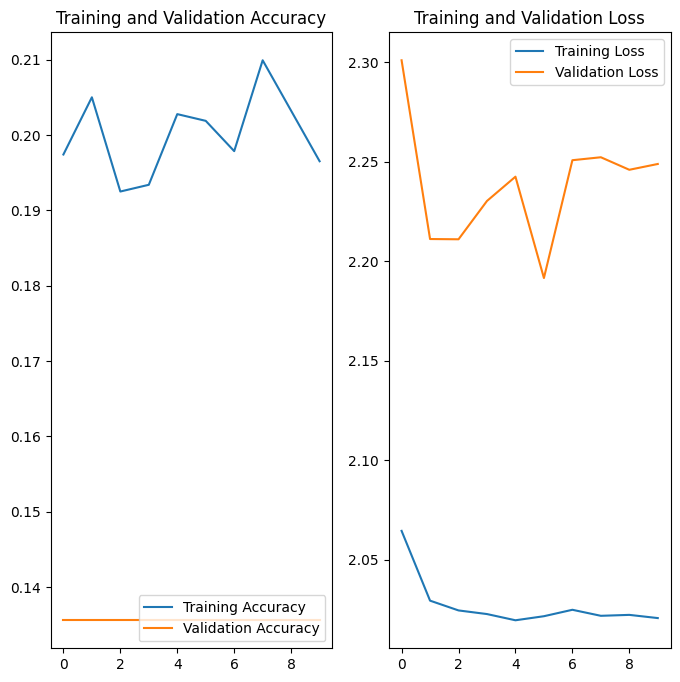

In [35]:
import matplotlib.pyplot as plt
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)



plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

After visualizing the dataset, it seems that both the training and validation accuracy is gone too low, which isnt a good sign and means the data is underfitting.

## Section 7: Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [36]:
## Your code goes here.
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [37]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/My Drive/CNN_Assignment/Skin c...,actinic keratosis
1,/content/gdrive/My Drive/CNN_Assignment/Skin c...,actinic keratosis
2,/content/gdrive/My Drive/CNN_Assignment/Skin c...,actinic keratosis
3,/content/gdrive/My Drive/CNN_Assignment/Skin c...,actinic keratosis
4,/content/gdrive/My Drive/CNN_Assignment/Skin c...,actinic keratosis
...,...,...
2234,/content/gdrive/My Drive/CNN_Assignment/Skin c...,vascular lesion
2235,/content/gdrive/My Drive/CNN_Assignment/Skin c...,vascular lesion
2236,/content/gdrive/My Drive/CNN_Assignment/Skin c...,vascular lesion
2237,/content/gdrive/My Drive/CNN_Assignment/Skin c...,vascular lesion


Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


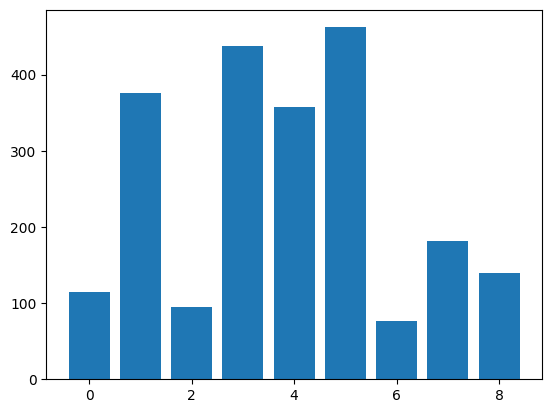

In [38]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

<BarContainer object of 9 artists>

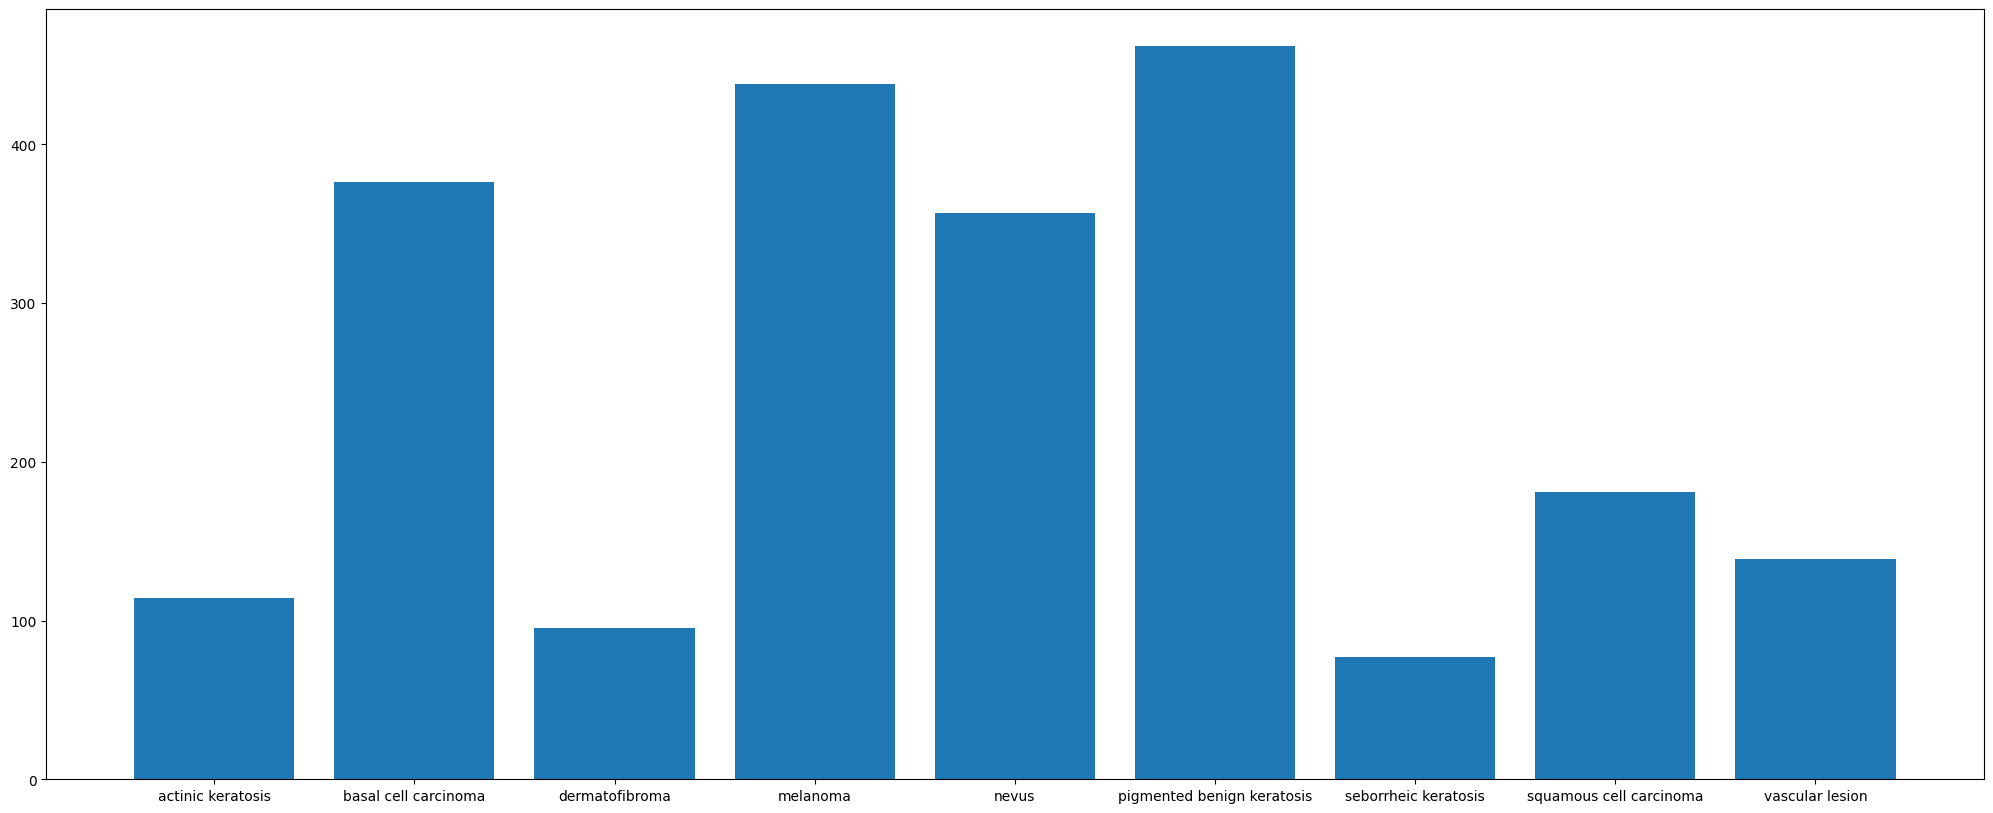

In [39]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here:

We see that there is a significant imbalance among the classes and hence we need to resolve this.

#### - Which class has the least number of samples?
      seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
      pigmented benign keratosis


## Section 8: Handling class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [40]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [41]:
path_to_training_dataset="/content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    p.process()

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F16CE250640>: 100%|██████████| 500/500 [00:10<00:00, 46.71 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F16CE250430>: 100%|██████████| 114/114 [00:02<00:00, 51.27 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F16CE039CF0>: 100%|██████████| 500/500 [00:12<00:00, 40.34 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F16CE2FBDC0>: 100%|██████████| 376/376 [00:09<00:00, 41.18 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F16D2DA4460>: 100%|██████████| 500/500 [00:11<00:00, 45.21 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F16D2E3E740>: 100%|██████████| 95/95 [00:01<00:00, 52.80 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2198x1603 at 0x7F16CE28BA60>: 100%|██████████| 500/500 [00:48<00:00, 10.30 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F16D2D219F0>: 100%|██████████| 438/438 [00:42<00:00, 10.32 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F16E63BF220>: 100%|██████████| 500/500 [00:42<00:00, 11.82 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F16D2EC1FC0>: 100%|██████████| 357/357 [00:30<00:00, 11.66 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F176807B2B0>: 100%|██████████| 500/500 [00:10<00:00, 47.66 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F16CE2EC040>: 100%|██████████| 462/462 [00:09<00:00, 49.83 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F16CE2C8280>: 100%|██████████| 500/500 [00:21<00:00, 22.78 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F16D2E25E70>: 100%|██████████| 77/77 [00:03<00:00, 23.91 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F16E634B7C0>: 100%|██████████| 500/500 [00:10<00:00, 49.47 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F16E636D000>: 100%|██████████| 181/181 [00:03<00:00, 54.45 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F16D2FDB010>: 100%|██████████| 500/500 [00:10<00:00, 48.24 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F16E636FF70>: 100%|██████████| 139/139 [00:02<00:00, 53.80 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [42]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

6739


### Lets see the distribution of augmented data after adding new images to the original training data.

In [43]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029133.jpg_62c80ea9-cd40-4a29-a4e9-8f7e033b28d5.jpg',
 '/content/gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029309.jpg_4a5d99a1-01ee-4f08-a74e-6bd1887f179b.jpg',
 '/content/gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029840.jpg_81d73bfa-b5f8-4738-9bf0-0087d416bd01.jpg',
 '/content/gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027254.jpg_8c06b39f-f21f-4f10-abba-368a3ca56fed.jpg',
 '/content/gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/ac

In [44]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [45]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [46]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-46-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [47]:
new_df['Label'].value_counts()

pigmented benign keratosis    1424
melanoma                      1376
basal cell carcinoma          1252
nevus                         1214
squamous cell carcinoma        862
vascular lesion                778
actinic keratosis              728
dermatofibroma                 690
seborrheic keratosis           654
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [48]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [49]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8978 files belonging to 9 classes.
Using 7183 files for training.


#### **Todo:** Create a validation dataset

In [50]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8978 files belonging to 9 classes.
Using 1795 files for validation.


## Model Building & training on the balanced data

#### Model 5: Final model - Model 4 on Balanced *data*


In [51]:
## your code goes here
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.BatchNormalization(),
  layers.Dense(num_classes,activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [52]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [53]:


epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


225/225 [==============================] - 38s 51ms/step - loss: 1.5741 - accuracy: 0.4338 - val_loss: 2.0938 - val_accuracy: 0.3426
Epoch 2/20
225/225 [==============================] - 6s 27ms/step - loss: 1.2179 - accuracy: 0.5599 - val_loss: 2.1757 - val_accuracy: 0.3404
Epoch 3/20
225/225 [==============================] - 6s 28ms/step - loss: 1.0074 - accuracy: 0.6454 - val_loss: 1.6009 - val_accuracy: 0.5203
Epoch 4/20
225/225 [==============================] - 6s 28ms/step - loss: 0.7368 - accuracy: 0.7372 - val_loss: 0.7939 - val_accuracy: 0.7309
Epoch 5/20
225/225 [==============================] - 6s 28ms/step - loss: 0.5662 - accuracy: 0.8043 - val_loss: 0.6957 - val_accuracy: 0.7649
Epoch 6/20
225/225 [==============================] - 6s 28ms/step - loss: 0.3869 - accuracy: 0.8661 - val_loss: 0.6813 - val_accuracy: 0.7593
Epoch 7/20
225/225 [==============================] - 6s 28ms/step - loss: 0.2884 - accuracy: 0.9012 - val_loss: 0.6278 - val_accuracy: 0.7855
Epoch 8/2

#### **Todo:**  Visualize the model results

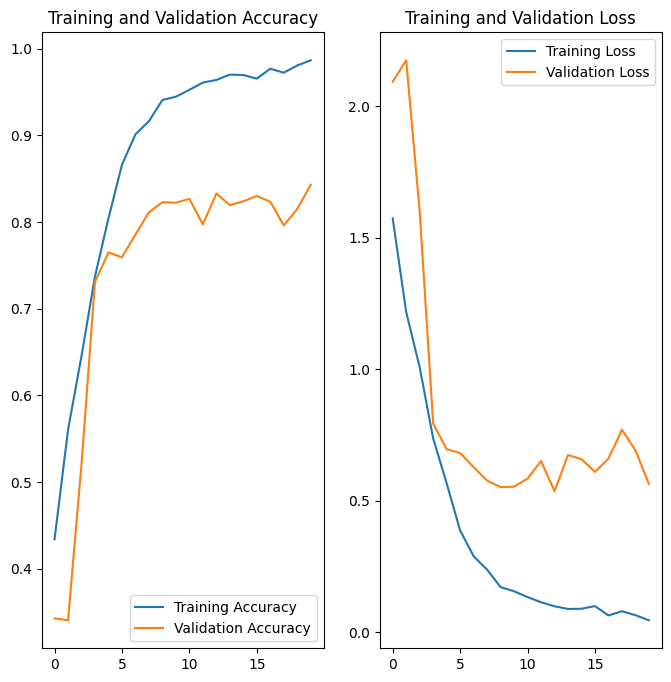

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Yes Class rebalance and batch normalization helped and the model shows good accuracy and is not underfitting or overfitting.

## Result Analysis:
- Problem of overfitting was reduced by adding dropout layers but not to a huge extent.
- Problem of overfitting was greatly reduced by real time augmentation. But the accuracy both training and validation went very low.
- To increase the training accuracy, Image data generator was used for Augmentation which didnt work.
- After checking if the data was imbalanced, it was found that there was class imbalance in the data and hence Augmentor was used to increase
the training dataset size for classes having less samples. This along with batch normalisation layers gave very good result and the training accuracy was seen as 98% while the validation accuracy was seen 84%